#Imports

In [8]:
!source venv/bin/activate

# this is for our data manipulations
import pandas as pd
import numpy as np

# this is for our visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

zsh:source:1: no such file or directory: venv/bin/activate


###Charge dataset
So here, we can fastly find our $n$,$m$ values  
>$n$=columns, $m$=rows  

In [17]:
# import the dataset
#path ==> 'data/'

path = '../data/'
df = pd.read_csv(path+'insurance.csv')
n_rows, n_cols = df.shape

print(f"Dataset columns : {n_cols}\nDataset rows : {n_rows}")
print("")

# looking into top rows and columns
df.head()

Dataset columns : 7
Dataset rows : 1338



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


>$n$=7, $m$=1338  

With $m$, our number of training examples, and $n$ our number of independant variables  

Here :  
>the features $x$ are : ***age, sex, bmi, children, smoker, region***  
>the target variable $y$ is : ***charges***  

That means we need to fit multiple linear regression  
In this project, we will use teta $(\theta)$ as a vector of $w,b$ (weight/bias)
>
>$$
>\theta = w,b
>$$
To compute the medical cost for an ***i*** person :
>$$
>h_\theta(x_i)
>$$  
So the hypothesis function for our dataset :  
>$$
>h_\theta(x_i) = \theta_0 + \theta_1 \cdot \text{age} + \theta_2 \cdot \text{sex} + \theta_3 \cdot \text{bmi} + \theta_4 \cdot \text{children} + \theta_5 \cdot \text{smoker} + \theta_6 \cdot \text{region}
>$$

So,  
If $i = 1$,  
$$
h_\theta(x_1) = \theta_0 + \theta_1 \cdot 19 + \theta_2 \cdot \text{female} + \theta_3 \cdot 27.900 + \theta_4 \cdot 1 + \theta_5 \cdot \text{yes} + \theta_6 \cdot \text{southwest}
$$
$$
y1 = 168884.92400
$$


Because we have : 
<p style="text-align:center;">
  <img src="../images/01_x1.png">
</p>  

$\theta_0$ = constant (bias/intercept), in french : biais/ordonnée à l'origine  
In fact, it's when all features = 0  
$\theta_1$ = coefficient of the 1st feature  
$\theta_2$ = coefficient of the 2nd feature  
...


It's determining the ***height*** of a feature $x$ on the ***model prediction***.  
Keep in mind that the best value of $\theta$ is the one who minimize the most the errors between predictions & true values.  
/!\ Index start from 0, so the first element $i$=1 is index 0.  

So our goal now will be to find best value of $\theta$

Before that, let's check if our dataset is clean

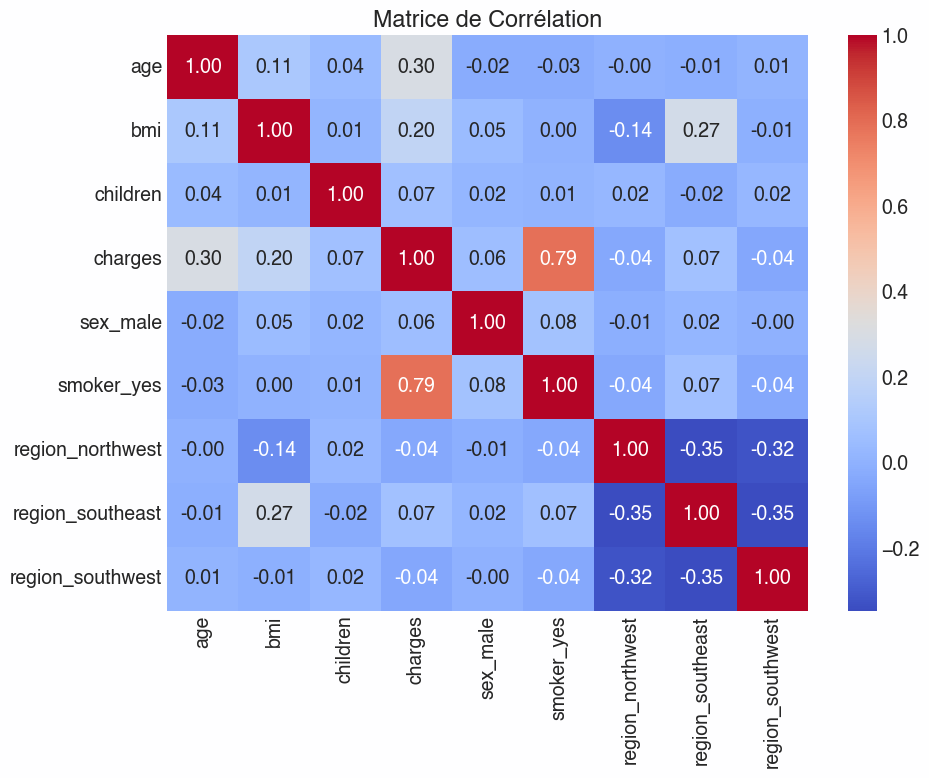

In [15]:
# copy of df to avoid modifying the original one
df_encoded = df.copy()

# conversion of categorical features into numerical ones
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# matrix of correlation computed between features
matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

Why **sex_female** is missing ?  

When we have categorical variables (like **sex** here),  
we do what is called **one-hot-enconding**  
It's the fact to transform  **alphanumerical** values into **numerical** values. 

But these 2 columns are redundant,  
because if $male=1$, we automaticly know that it's not $female=0$.

**sex_male** & **sex_female** are perfectly negatively correlated $(-1)$

**pd.get_dummies()** : sélectionner les valeurs catégoriques

**drop_first=True** : binary encodage -> avoid multicolinearity  
best method here for efficiency because we have only 2 values



If we use both variables in LM, we will have some problems, because variables are not independants  
It's called : **dummy variable trap**

<p style="text-align:center;">
  <img src="../images/02_oneHotEncoding.png">
</p>  

<p style="text-align:center;">
  <img src="../images/03_oneHotEncodingDataset.png">
</p>

Now, let's analyse the bests correlations we have.

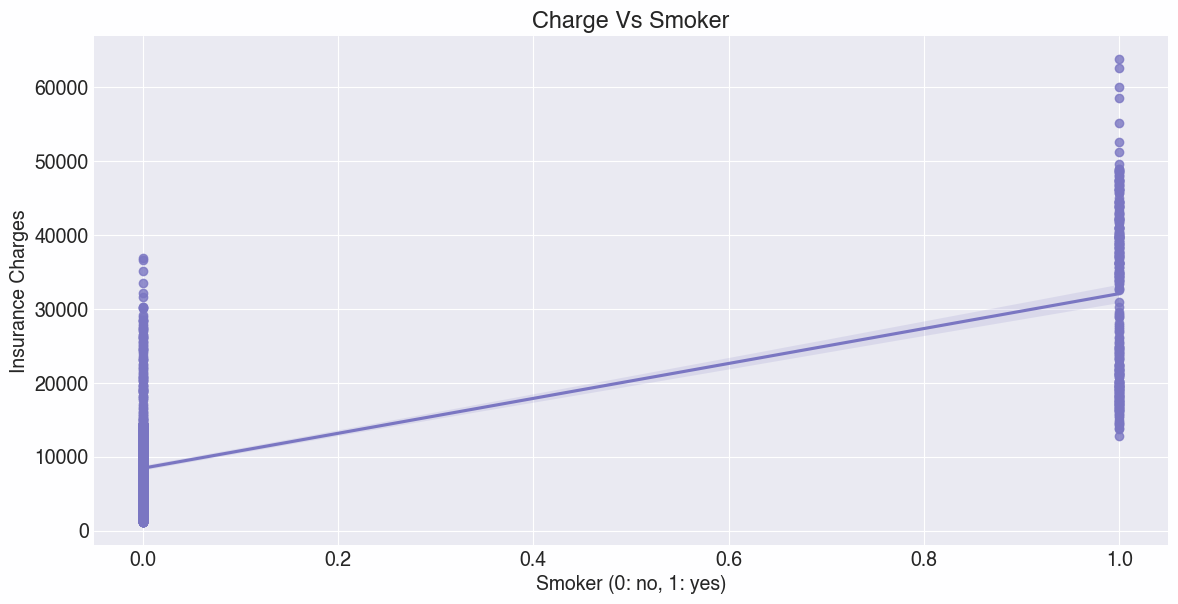

In [68]:
df_encoded = df.copy()
df_encoded['smoker_numeric'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

sns.lmplot(x='smoker_numeric', y='charges', data=df_encoded, aspect=2, height=6)
plt.xlabel('Smoker (0: no, 1: yes)')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs Smoker');
plt.show()


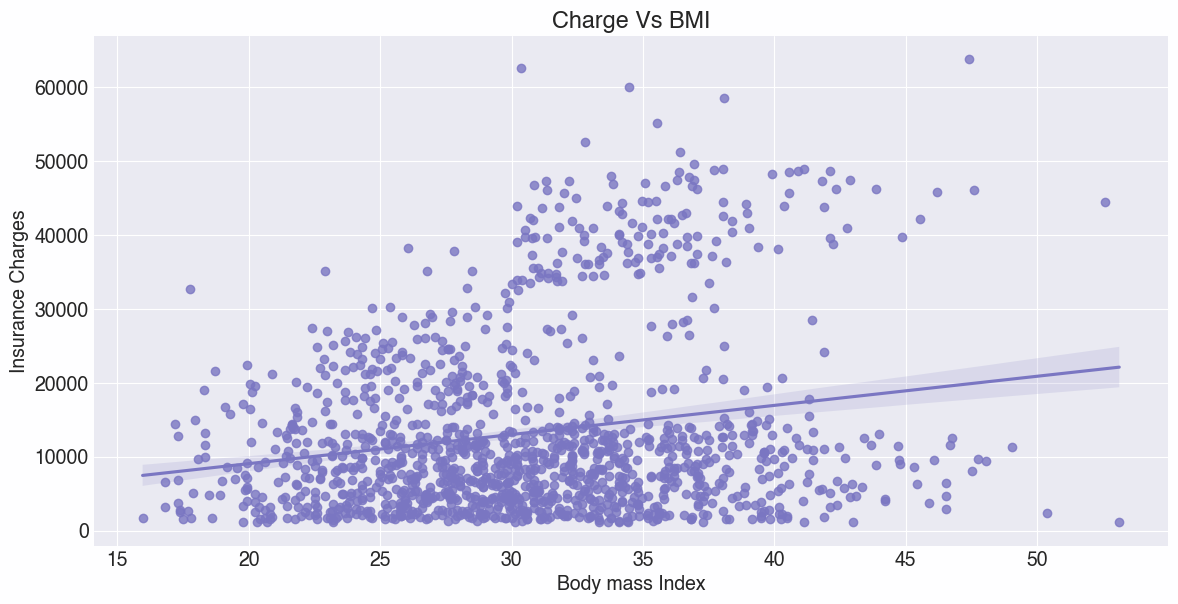

In [69]:
sns.lmplot(x='bmi', y='charges', data=df_encoded, aspect=2, height=6)
plt.xlabel('Body mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI');
plt.show()

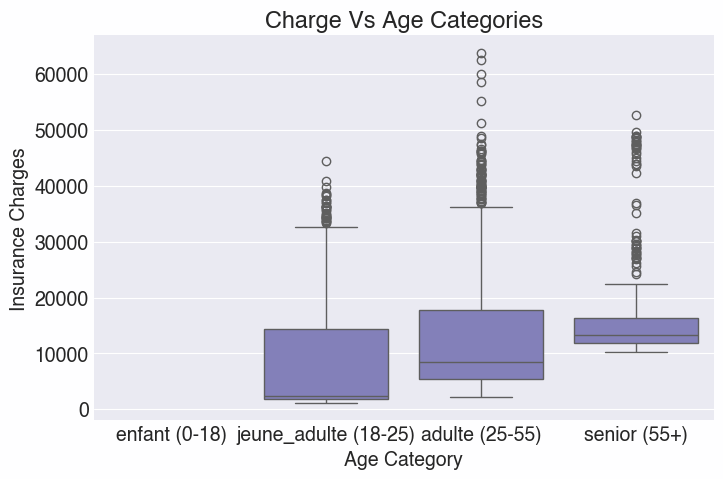

In [47]:
# age categories
bins = [0, 18, 25, 55, 100]
labels = ['enfant (0-18)', 'jeune_adulte (18-25)', 'adulte (25-55)', 'senior (55+)']
df_encoded['age_category'] = pd.cut(df_encoded['age'], bins=bins, labels=labels, right=False)

sns.boxplot(x='age_category', y='charges', data=df_encoded)
plt.xlabel('Age Category')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs Age Categories');
plt.show()

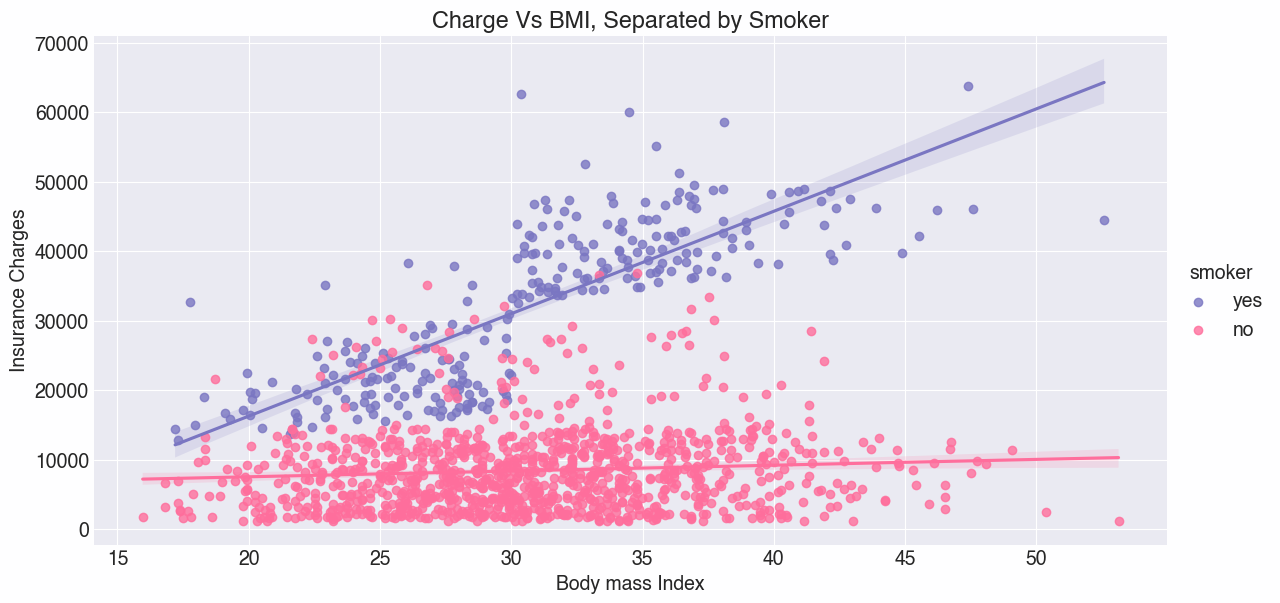

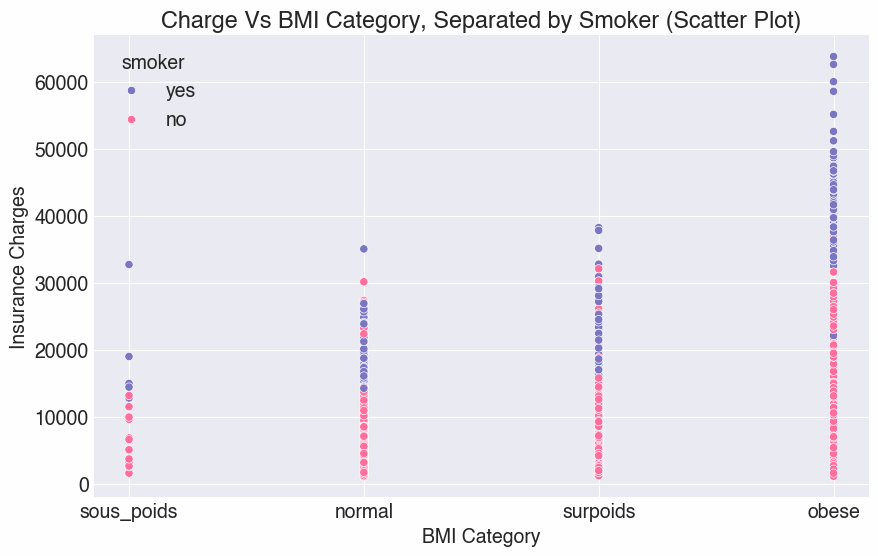

In [52]:


# BMI categories
bins_bmi = [0, 18.5, 25, 30, 100]
labels_bmi = ['sous_poids', 'normal', 'surpoids', 'obese']
df_encoded['bmi_category'] = pd.cut(df_encoded['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

# feature engineering : interaction between bmi & smoker
df_encoded['bmi_smoker_interaction'] = df_encoded['bmi'] * df_encoded['smoker_numeric']

sns.lmplot(x='bmi', y='charges', data=df_encoded, hue='smoker', aspect=2, height=6)
plt.xlabel('Body mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI, Separated by Smoker');
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi_category', y='charges', hue='smoker', data=df_encoded)
plt.xlabel('BMI Category')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI Category, Separated by Smoker (Scatter Plot)');
plt.show()

In [49]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


#Cost function

The cost function measure the errors between predicted and real values in our model.  
There is the cost function called Mean Squared Error (MSE) for a dataset with $m$ training examples.
>$$
>J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
>$$
It's represent the mean of the squared errors.

To implement the linear regression, take training example add an extra column that is  $X_{0}$ feature  
>[\
$X$ = 
\begin{pmatrix}
x_{10} & x_{11} & x_{12} & \dots & x_{1n} \\
x_{20} & x_{21} & x_{22} & \dots & x_{2n} \\
x_{m0} & x_{m1} & x_{m2} & \dots & x_{mn}
\end{pmatrix}_{(m,n+1)}
\]

Now, we rewrite the least square cost function in matrix form :

>$$
J(\theta) = \frac{1}{2m} \left( X\theta - y \right)^T \left( X\theta - y \right)
$$



#J derivative

To minimize our cost function and also obtain optimal values for >$\theta$, we need to compute the derivative of $J(\theta)$ ***(matrix form)***
>$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$
This function is called **GRADIENT**  
**Gradient** : derivative of a vectorial function (several parameters)  

We can see here that we have $0,79 (>0,7)$ between feature $x$ **'smoker_yes'** & target $y$ **'charges'**.  
>That means if a person is a smoker, it will have a big height into the amount of medical charges.

#Gradient descent

Now that we have our cost function, we can compute the gradient descent to find the best value of $\theta$  
The gradient descent is an algorithm that will find the best value of $\theta$ by minimizing the cost function  
It's an iterative algorithm that will update the value of $\theta$ until it converges to the best value  

The update rule is :  
>$$
\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla_\theta J(\theta^{(i)})
$$

$\theta^{(i+1)} =$ updated value of the parameters vector $\theta$  
$\theta^{(i)} =$ the current value of the parameter vector $\theta$ at the current iteration $i$  
$\alpha =$ learning rate, hyperparameter that determines the step size taken during each iteration  
$\nabla_\theta J(\theta^{(i)}) =$ gradient of the cost function J evaluated at the current parameter vector $\theta^{(i)}$



Now we have our formula, we can implement it in code to train our linear regression model.